In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Supplementary 2.csv')  # Replace 'your_dataset.csv' with the actual filename

# Preprocess the data (you may need to handle missing values and text data)
# For this example, we'll drop rows with missing values
data.dropna(inplace=True)

# Define the features (X) and the target variable (y)
X = pd.get_dummies(data[['YEAR', 'WEIGHT','GENE','REF_GENE','REF_SENTENCE','TITLE','DIS_CLASS','CONCLUSION']])

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['ASSOCIATION_CLASS'])  # Convert string labels to numerical labels

# Determine the number of unique classes for output layer
num_classes = len(label_encoder.classes_)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fill missing values if any
X.fillna(0, inplace=True)  # You can use other techniques for imputation

# Convert DataFrame to NumPy array
X_train = X_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)

# Define the neural network model using TensorFlow and Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for classification
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the testing data
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/10
42/42 [==============================] - 0s 1ms/step - loss: 1.7583 - accuracy: 0.4649
Epoch 2/10
42/42 [==============================] - 0s 1ms/step - loss: 1.0880 - accuracy: 0.5627
Epoch 3/10
42/42 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.7246
Epoch 4/10
42/42 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.9515
Epoch 5/10
42/42 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9784
Epoch 6/10
42/42 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9881
Epoch 7/10
42/42 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9933
Epoch 8/10
42/42 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9948
Epoch 9/10
42/42 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9963
Epoch 10/10
11/11 [==============================] - 0s 800us/step
Accuracy: 0.7946428571428571


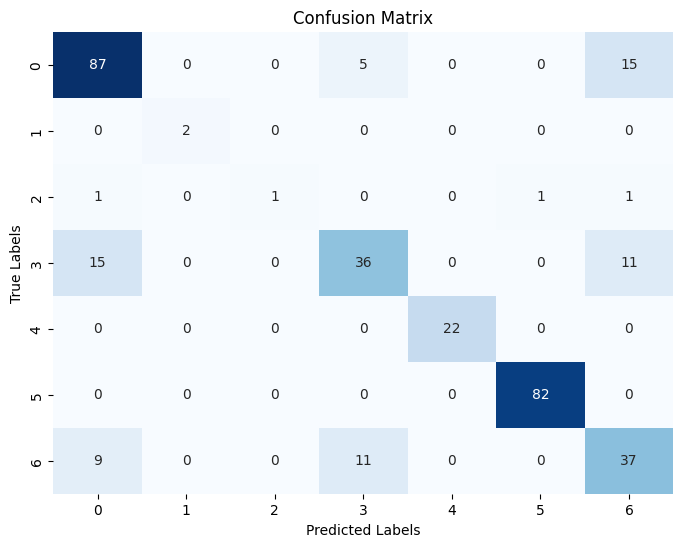

In [21]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       107
           1       1.00      1.00      1.00         2
           2       1.00      0.25      0.40         4
           3       0.69      0.58      0.63        62
           4       1.00      1.00      1.00        22
           5       0.99      1.00      0.99        82
           6       0.58      0.65      0.61        57

    accuracy                           0.79       336
   macro avg       0.86      0.76      0.78       336
weighted avg       0.80      0.79      0.79       336

